# Packages

In [360]:
import numpy as np              
import matplotlib.pyplot as plt 
import pandas as pd             
import seaborn as sns           
               
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.features import pca_decomposition
from yellowbrick.target import class_balance
from yellowbrick.classifier import confusion_matrix, class_prediction_error

# Load Dataset

In [300]:
file = "https://raw.githubusercontent.com/SergeyNovak777/ML/main/healthcare-dataset-stroke-data.csv"

In [301]:
data = pd.read_csv(file)

# Short info about dataset

In [302]:
shape_ = data.shape
print("rows: {0}; columns: {1} \n".format( shape_[0], shape_[1] ))

rows: 5110; columns: 12 



In [303]:
columns = data.columns
for (idx, feature) in enumerate(columns):
    print("idx: {}; feature: {}; \n".format(idx, feature))

idx: 0; feature: id; 

idx: 1; feature: gender; 

idx: 2; feature: age; 

idx: 3; feature: hypertension; 

idx: 4; feature: heart_disease; 

idx: 5; feature: ever_married; 

idx: 6; feature: work_type; 

idx: 7; feature: Residence_type; 

idx: 8; feature: avg_glucose_level; 

idx: 9; feature: bmi; 

idx: 10; feature: smoking_status; 

idx: 11; feature: stroke; 



In [304]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## ***What we see?***

1. **Id** trash feature ( we will delete him)
2. **Gender** Binary(Categorialy)
3. **Age** Numerical 
4. **Hypertension** Binary(Categorialy)
5. **heart_dease** Binary(Categorialy)
6. **ever_married** Binary(Categorialy)
7. **work_type** Binary(Categorialy)
8. **residence_type** Binary(Categorialy)
9. **avg_glucose_level** Numerical
10. **mbi** Numerical
11. **smoking_status** Categorialy
12. **stroke** Binary(Categorialy)


---


***We will predict stroke***

## ***Now we get total describe about dataset***

In [305]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


# Clearing dataset

In [306]:
missing_value = ['#NUM!', np.nan]
df=pd.read_csv(file, na_values = missing_value)

In [307]:
#@title Текст заголовка по умолчанию
# Change type data from object on category

"""cat_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
               'Residence_type', 'smoking_status', 'stroke']

df[cat_columns] = df[cat_columns].astype('category')"""

"cat_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',\n               'Residence_type', 'smoking_status', 'stroke']\n\ndf[cat_columns] = df[cat_columns].astype('category')"

In [308]:
cat_col = df.select_dtypes(include = 'object')
cat_col.columns

df = pd.get_dummies( data =df, drop_first = True)

In [309]:
cl = ['hypertension', 'heart_disease', 'stroke', 'gender_Male', 'gender_Other',
      'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed',
      'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked',
      'smoking_status_never smoked', 'smoking_status_smokes']

df[cl] = df[cl].astype('category')

In [310]:
# Check on NaN
df.isnull().sum()

id                                  0
age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
gender_Male                         0
gender_Other                        0
ever_married_Yes                    0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Urban                0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [311]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [312]:
# Check on Null
df.isnull().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [313]:
# Check on dublicats
df.duplicated().sum()

0

In [314]:
df = df.drop('id', axis=1)
df = df.drop('gender_Other', axis=1)

In [315]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,0,1,0,0,0,1,0,0


In [316]:
# and another get total info about dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60


In [317]:
df.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0


# Split Data

In [354]:
X = df.drop('stroke', axis=1)
Y = df['stroke']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

classes = Y.unique()

In [355]:
print('Size train: ',N_train)
print('Size test: ', N_test)

Size train:  4088
Size test:  1022


# Visualization data

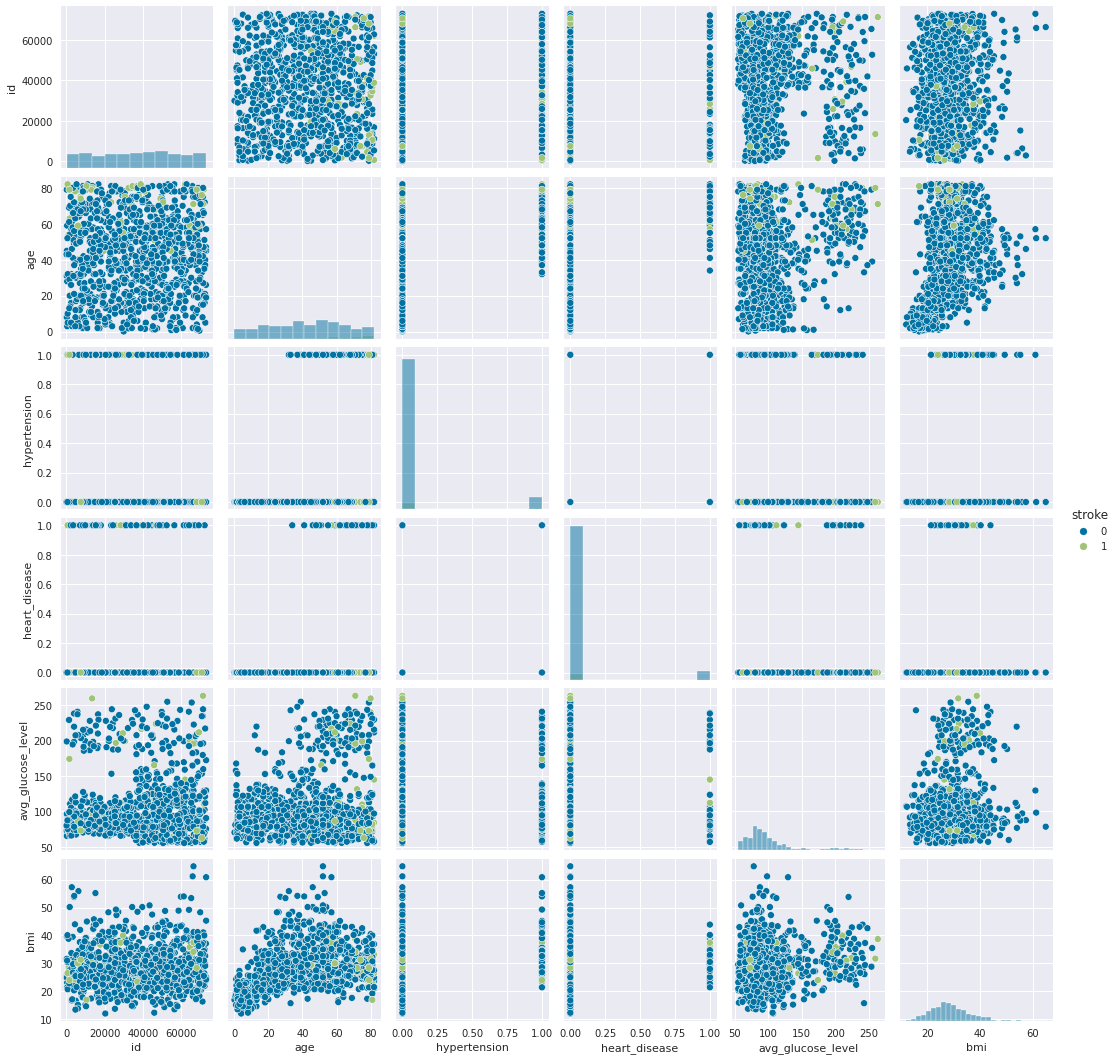

In [320]:
sns.pairplot(data.iloc[np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)], hue='stroke', diag_kind='hist')

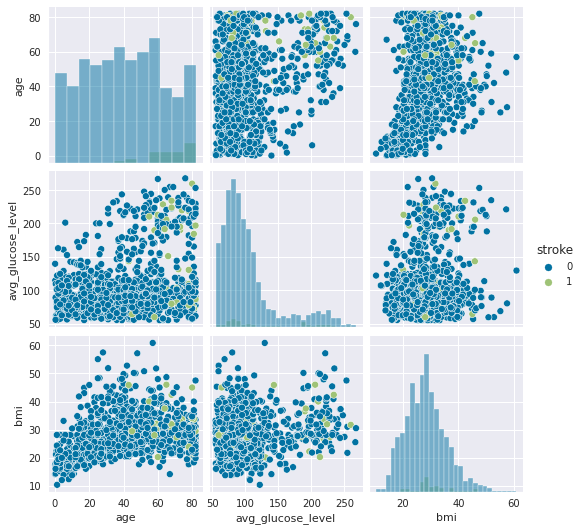

In [330]:
sns.pairplot(df.iloc[np.random.choice(np.arange(df.shape[0]), size=1000, replace=False)], hue='stroke', diag_kind='hist')

In [321]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.324296
avg_glucose_level,0.238171,1.000000,0.166876
bmi,0.324296,0.166876,1.000000


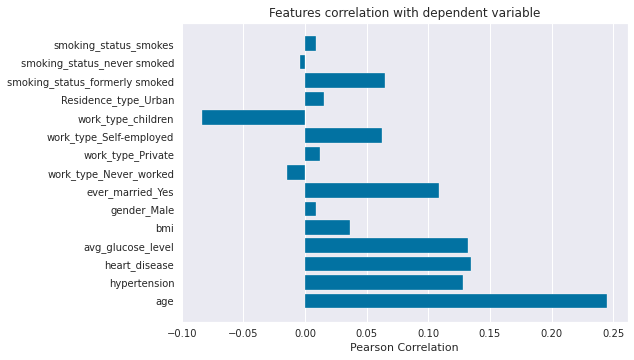

In [322]:
feature_correlation(X, Y);

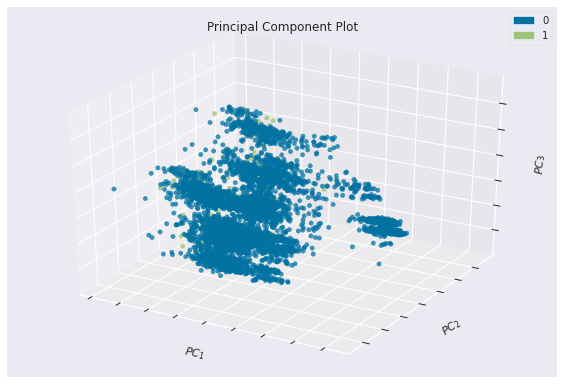

In [323]:
pca_decomposition(X, Y.astype(int), projection=3);

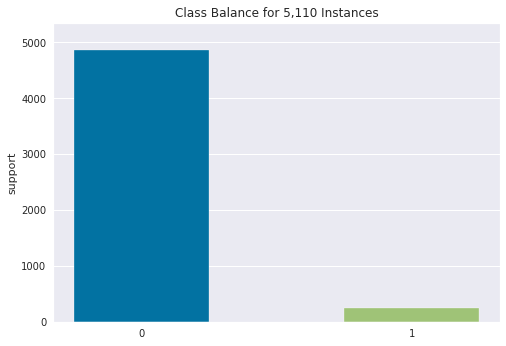

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f09dbcf5ee0>)

In [324]:
class_balance(Y)

# Balance

In [325]:
X_ = pd.concat([X_train, Y_train],axis=1)

not_stroke=X_[X_.stroke==0]
stroke=X_[X_.stroke==1]

In [326]:
not_safe_downsampled = resample(not_stroke,
                                replace = False,
                                n_samples = len(stroke),
                                random_state = 27)
downsampled = pd.concat([not_safe_downsampled, stroke])
downsampled.stroke.value_counts()

0    187
1    187
Name: stroke, dtype: int64

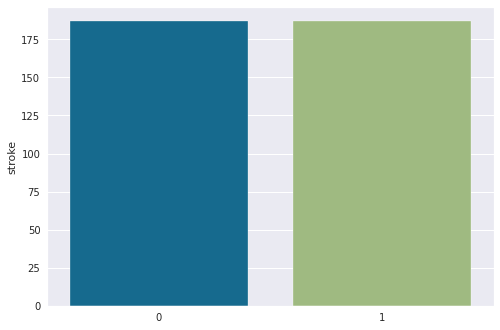

In [327]:
y=downsampled.stroke.value_counts()
sns.barplot(y=y,x=[0,1])

# split balance

In [366]:
X = downsampled.drop('stroke', axis=1)
Y = downsampled['stroke']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

classes = Y.unique()

# Visualization balanced

In [338]:
corr = downsampled.corr() 
corr.style.background_gradient(cmap='coolwarm')

,age,avg_glucose_level,bmi
age,1.000000,0.243473,0.169840
avg_glucose_level,0.243473,1.000000,0.238447
bmi,0.169840,0.238447,1.000000


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


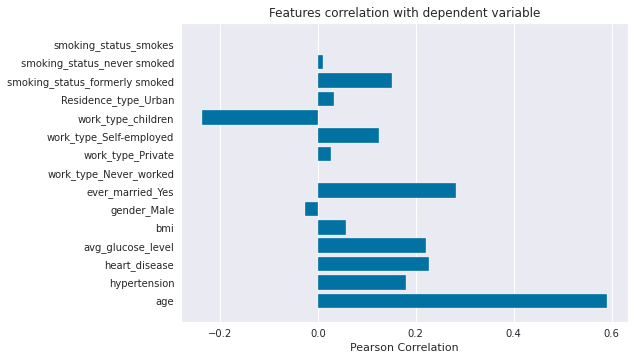

In [339]:
feature_correlation(X, Y);

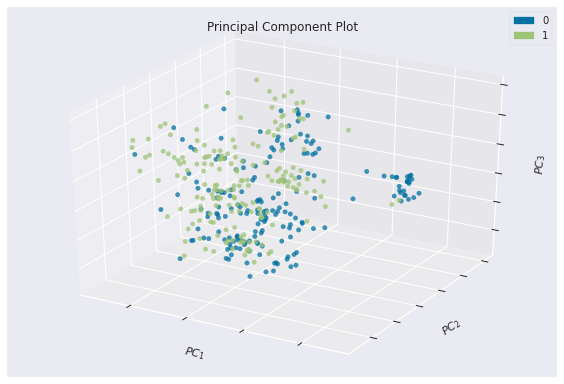

In [340]:
pca_decomposition(X, Y.astype(int), projection=3);

# KNN

In [410]:
LR = KNeighborsClassifier(n_neighbors = 49)
LR.fit(X_train, Y_train)

LR_training_predict = LR.score(X_train, Y_train)
LR_test_predict = LR.score(X_test, Y_test)

err_train = np.mean(Y_train != LR.predict(X_train))
err_test  = np.mean(Y_test  != LR.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(LR_training_predict, LR_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.81, Test: 0.65. 
Error. Train : 0.19, Test: 0.35. 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


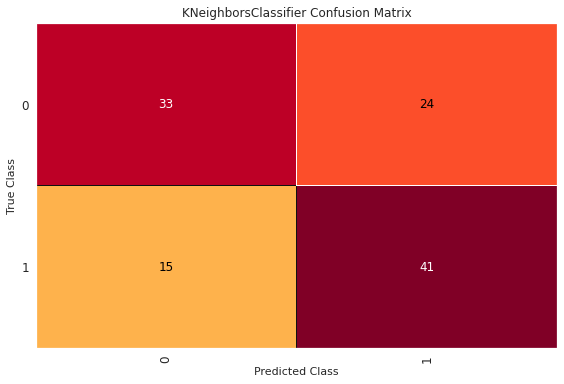

ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f09d1e3bb20>,
                classes=[0, 1]
Categories (2, int64): [0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f09d1ef1df0>,
                estimator=KNeighborsClassifier(n_neighbors=49))

In [411]:
confusion_matrix(LR, X_train, Y_train, X_test, Y_test, classes=classes)

In [412]:
LR = KNeighborsClassifier(n_neighbors = 5)
LR.fit(X_train, Y_train)

LR_training_predict = LR.score(X_train, Y_train)
LR_test_predict = LR.score(X_test, Y_test)

err_train = np.mean(Y_train != LR.predict(X_train))
err_test  = np.mean(Y_test  != LR.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(LR_training_predict, LR_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.82, Test: 0.63. 
Error. Train : 0.18, Test: 0.37. 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


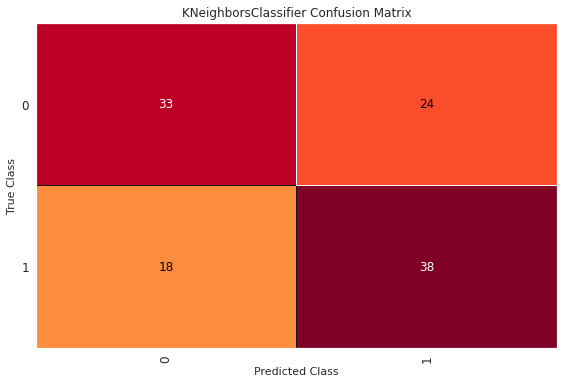

ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f09d1de8760>,
                classes=[0, 1]
Categories (2, int64): [0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f09d1fb33a0>,
                estimator=KNeighborsClassifier())

In [413]:
confusion_matrix(LR, X_train, Y_train, X_test, Y_test, classes=classes)

In [390]:
#@title Текст заголовка по умолчанию
keighs = np.arange(1, 100, 1)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neigh in keighs:
    mlp_model = KNeighborsClassifier(n_neighbors = neigh)
    mlp_model.fit(X_train, Y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(Y_train != y_train_pred))
    test_err.append(np.mean(Y_test != y_test_pred))
    
    train_acc.append(accuracy_score(Y_train, y_train_pred))
    test_acc.append(accuracy_score(Y_test, y_test_pred))

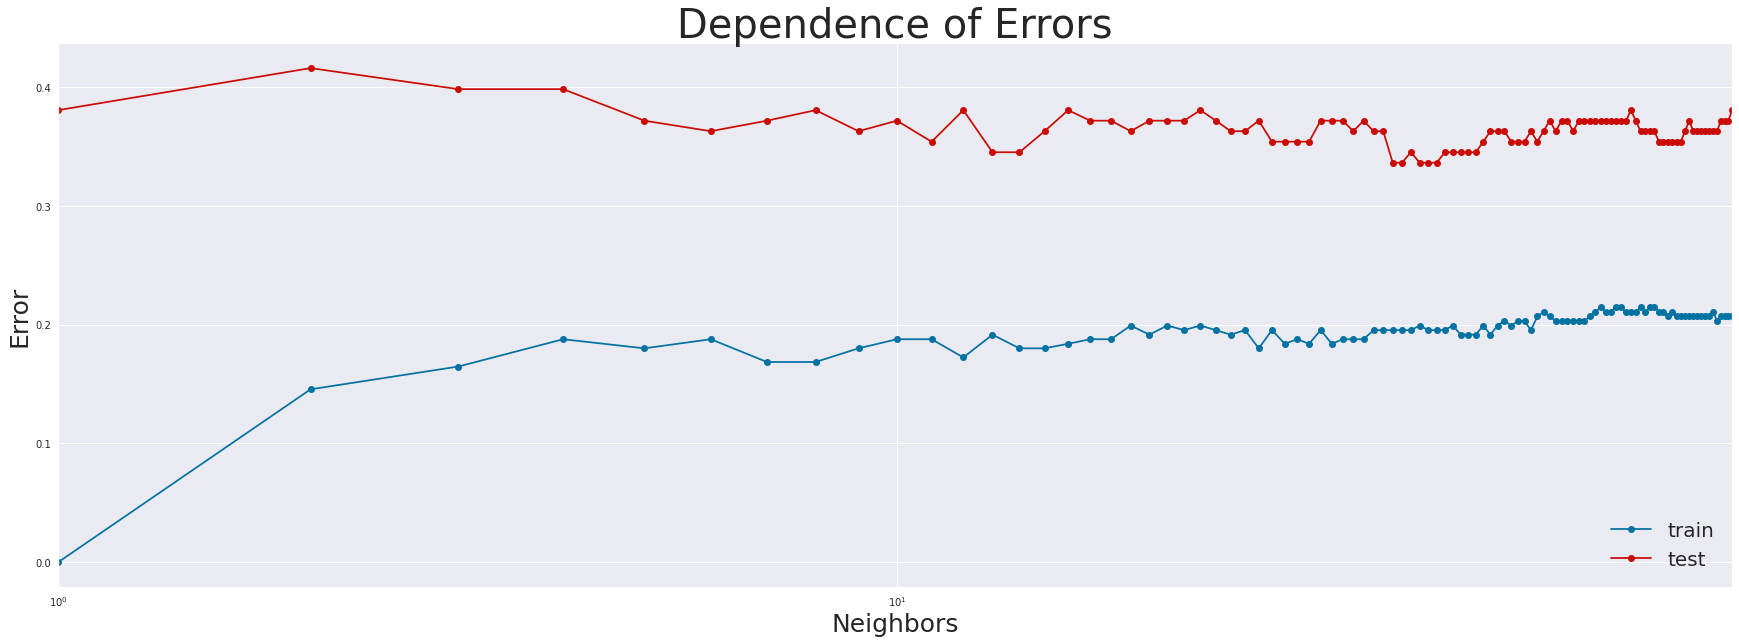

In [391]:
#@title Текст заголовка по умолчанию
plt.figure(figsize = (30, 10))

plt.semilogx(keighs, train_err, 'b-o', label = 'train')
plt.semilogx(keighs, test_err, 'r-o', label = 'test')

plt.xlim([np.min(keighs), np.max(keighs)])

plt.title('Dependence of Errors', fontsize = 40)
plt.xlabel('Neighbors', fontsize = 25)
plt.ylabel('Error', fontsize = 25)

plt.legend(fontsize = 20)

# Logistic Regression

In [392]:
LR = LogisticRegression(max_iter=500)
LR.fit(X_train, Y_train)

LR_training_predict = LR.score(X_train, Y_train)
LR_test_predict = LR.score(X_test, Y_test)

err_train = np.mean(Y_train != LR.predict(X_train))
err_test  = np.mean(Y_test  != LR.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(LR_training_predict, LR_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.84, Test: 0.67. 
Error. Train : 0.16, Test: 0.33. 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


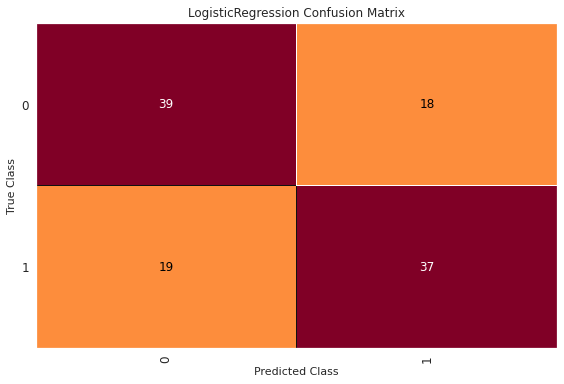

ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f09d1ef1610>,
                classes=[0, 1]
Categories (2, int64): [0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f09d1ef1910>,
                estimator=LogisticRegression(max_iter=500))

In [409]:
confusion_matrix(LR, X_train, Y_train, X_test, Y_test, classes=classes)

# RandomForest

In [418]:
RanForest = RandomForestClassifier(n_estimators = 100)
RanForest.fit(X_train, Y_train)

RanForest_training_predict = RanForest.score(X_train, Y_train)
RanForest_test_predict = RanForest.score(X_test, Y_test)

err_train = np.mean(Y_train != RanForest.predict(X_train))
err_test  = np.mean(Y_test  != RanForest.predict(X_test))

print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(RanForest_training_predict, RanForest_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 1.00, Test: 0.67. 
Error. Train : 0.00, Test: 0.33. 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


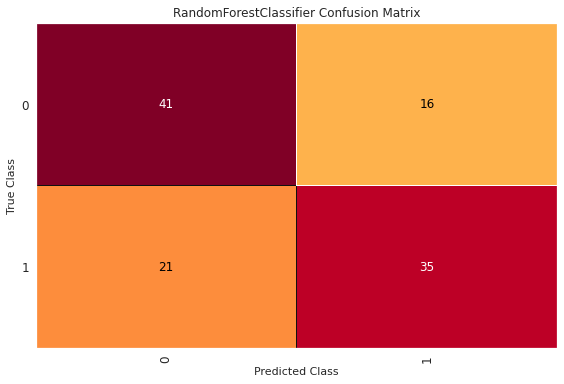

ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f09d1d3ba60>,
                classes=[0, 1]
Categories (2, int64): [0, 1],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f09d1d7bcd0>,
                estimator=RandomForestClassifier())

In [419]:
confusion_matrix(RanForest, X_train, Y_train, X_test, Y_test, classes=classes)

In [423]:
#@title Текст заголовка по умолчанию
maxdepths = np.arange(1, 200, 1)
test_err = []
train_err = []
train_acc = []
test_acc = []

for maxdepth in maxdepths:
    mlp_model = RandomForestClassifier(n_estimators = 100, max_depth = maxdepth)
    mlp_model.fit(X_train, Y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(Y_train != y_train_pred))
    test_err.append(np.mean(Y_test != y_test_pred))
    
    train_acc.append(accuracy_score(Y_train, y_train_pred))
    test_acc.append(accuracy_score(Y_test, y_test_pred))

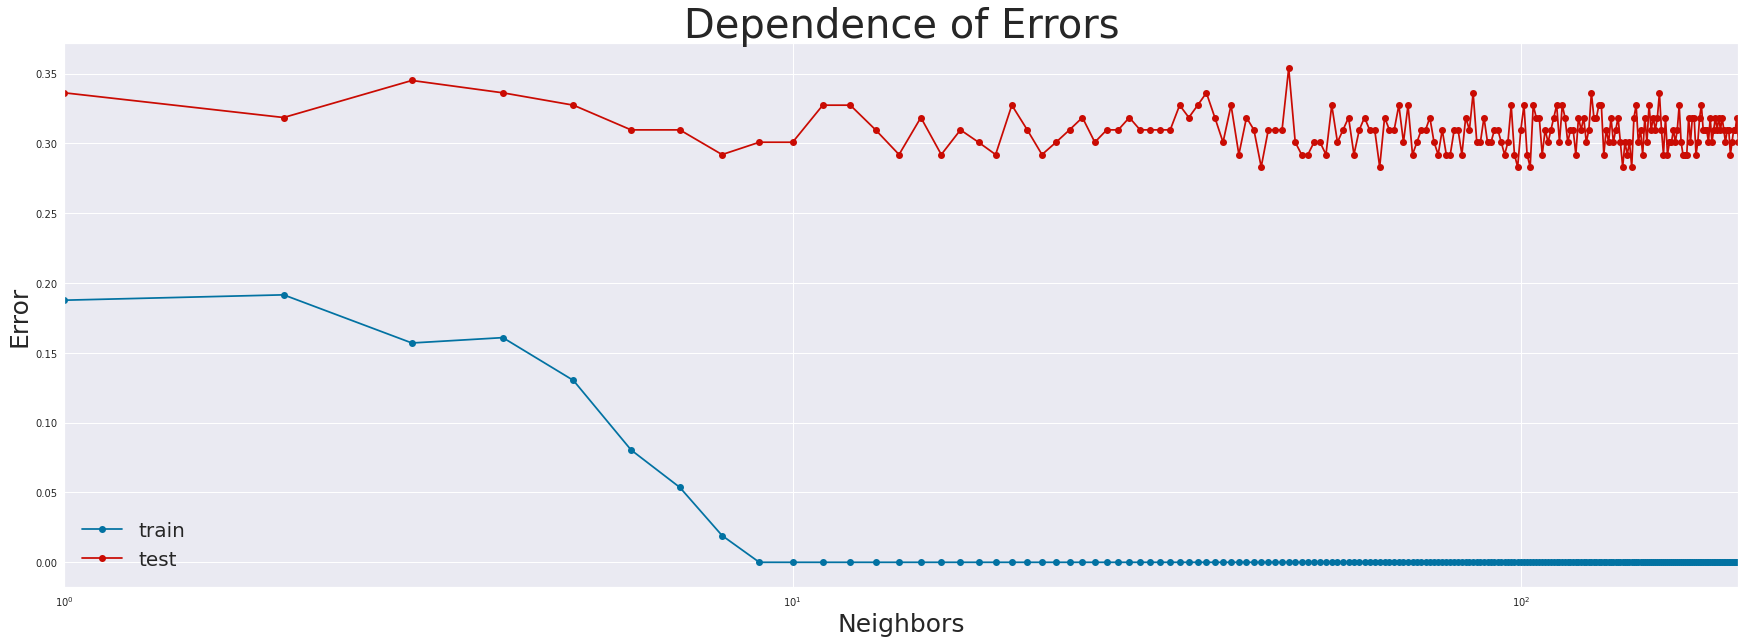

In [425]:
#@title Текст заголовка по умолчанию
plt.figure(figsize = (30, 10))

plt.semilogx(maxdepths, train_err, 'b-o', label = 'train')
plt.semilogx(maxdepths, test_err, 'r-o', label = 'test')

plt.xlim([np.min(maxdepths), np.max(maxdepths)])

plt.title('Dependence of Errors', fontsize = 40)
plt.xlabel('Neighbors', fontsize = 25)
plt.ylabel('Error', fontsize = 25)

plt.legend(fontsize = 20)

#

# Network

In [431]:
NN = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=1000)
NN.fit(X_train, Y_train)

#score
NN_training_predict = NN.score(X_train, Y_train)
NN_test_predict = NN.score(X_test, Y_test)

# error
err_train = np.mean(Y_train != NN.predict(X_train))
err_test  = np.mean(Y_test  != NN.predict(X_test))

# print
print("Accuracy. Train : {:.2f}, Test: {:.2f}. ".format(NN_training_predict, NN_test_predict))
print("Error. Train : {:.2f}, Test: {:.2f}. ".format(err_train, err_test))

Accuracy. Train : 0.83, Test: 0.65. 
Error. Train : 0.17, Test: 0.35. 


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


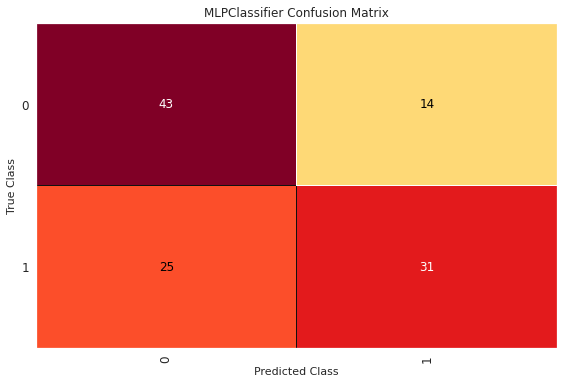

In [432]:
confusion_matrix(NN, X_train, Y_train, X_test, Y_test, classes=classes);

In [433]:
array_neurons = np.arange(1, 50, 1)
test_err = []
train_err = []
train_acc = []
test_acc = []

for neurons in array_neurons:
    NN = MLPClassifier(hidden_layer_sizes=(150, 100, neurons), max_iter=1000)
    mlp_model.fit(X_train, Y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(Y_train != y_train_pred))
    test_err.append(np.mean(Y_test != y_test_pred))
    
    train_acc.append(accuracy_score(Y_train, y_train_pred))
    test_acc.append(accuracy_score(Y_test, y_test_pred))

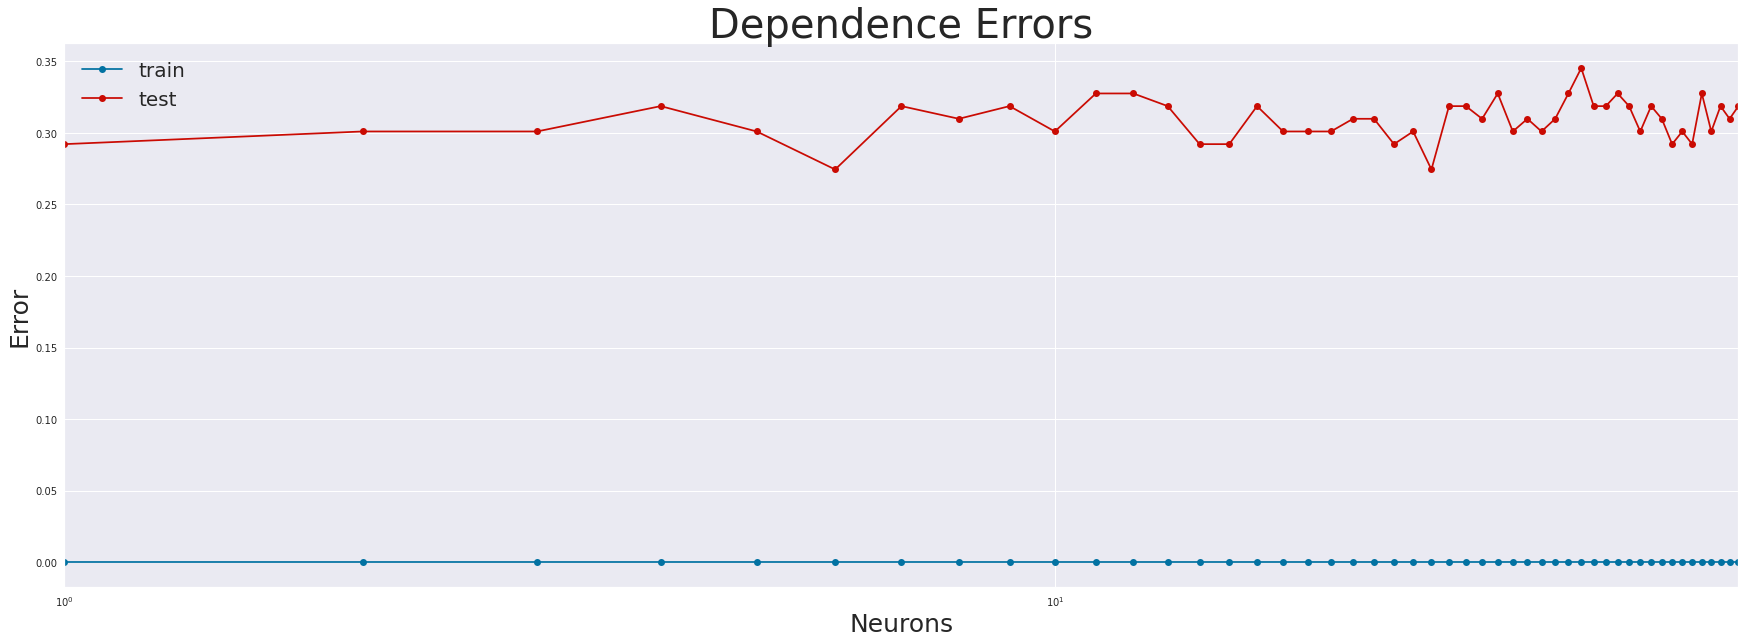

In [434]:
plt.figure(figsize = (30, 10))

plt.semilogx(array_neurons, train_err, 'b-o', label = 'train')
plt.semilogx(array_neurons, test_err, 'r-o', label = 'test')

plt.xlim([np.min(array_neurons), np.max(array_neurons)])

plt.title('Dependence of Errors', fontsize = 40)
plt.xlabel('Neurons', fontsize = 25)
plt.ylabel('Error', fontsize = 25)

plt.legend(fontsize = 20)

In [435]:
num_elems_arr = [x for x in range(1, 50, 1)]
alpha_arr = np.logspace(-3, 2, 5)
test_err = []
train_err = []
train_acc = []
test_acc = []

alpha_opts = []
min_test_errors = []
min_train_errors = []
min_test_accuracy = []
min_train_accuracy = []

for index, neurons in enumerate(num_elems_arr):

    test_err.append(np.array([]))
    train_err.append(np.array([]))
    train_acc.append(np.array([]))
    test_acc.append(np.array([]))

    for alpha in alpha_arr:

        NN = MLPClassifier(hidden_layer_sizes=(150, 100, neurons), alpha = alpha, max_iter=1000)
        mlp_model.fit(X_train, Y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)

        train_err[index] = np.append(train_err[index], np.mean(Y_train != y_train_pred))
        test_err[index] = np.append(test_err[index], np.mean(Y_test != y_test_pred))

        train_acc[index] = np.append(train_acc[index], accuracy_score(Y_train, y_train_pred))
        test_acc[index] = np.append(test_acc[index], accuracy_score(Y_test, y_test_pred))

    min_test_err = np.min(test_err[index])
    alpha_opts.append(alpha_arr[test_err[index] == min_test_err])

    min_test_errors.append(min_test_err)
    tmp = test_err[index] == min_test_err

    min_train_errors.append(train_err[index][test_err[index] == min_test_err][0])
    min_test_accuracy.append(test_acc[index][test_err[index] == min_test_err][0])
    min_train_accuracy.append(train_acc[index][test_err[index] == min_test_err][0])

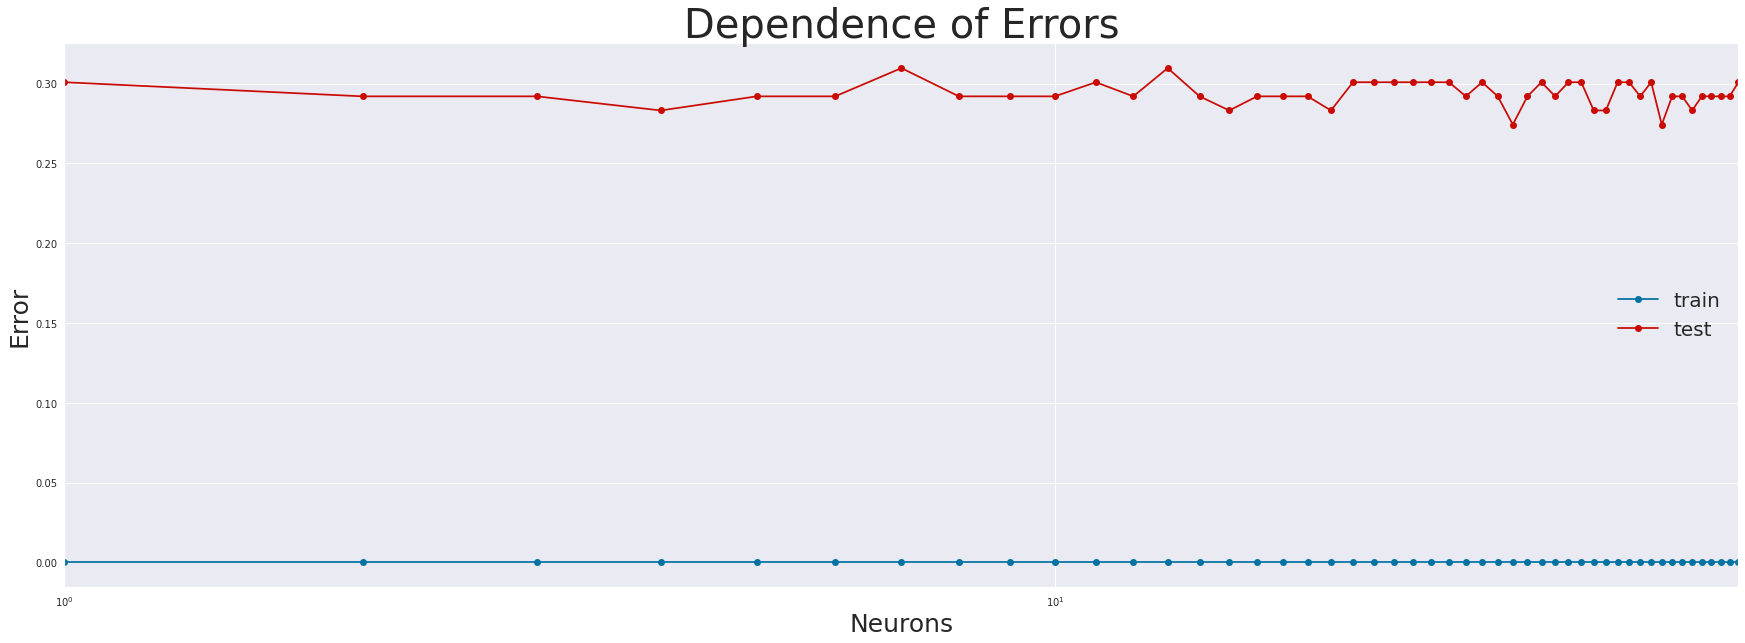

In [439]:
plt.figure(figsize = (30, 10))

plt.semilogx(num_elems_arr, min_train_errors, 'b-o', label = 'train')
plt.semilogx(num_elems_arr, min_test_errors, 'r-o', label = 'test')

plt.xlim([np.min(num_elems_arr), np.max(num_elems_arr)])

plt.title('Dependence of Errors', fontsize = 40)
plt.xlabel('Neurons', fontsize = 25)
plt.ylabel('Error', fontsize = 25)

plt.legend(fontsize = 20)